# PBLH analysis for SRFP

### Time series and statistical performance

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from descartes import PolygonPatch
import statsmodels.api as sm
import scipy.interpolate

# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_style("ticks")

In [2]:
from functions import rplot, qqplot, stat_calc

In [3]:
dfnov = pd.read_csv('./data/pblh_nov.csv')
dfdec = pd.read_csv('./data/pblh_dec.csv')
dfjan = pd.read_csv('./data/pblh_jan.csv')

In [4]:
dfnov.head()

,date,time,datetime,pbl_stull_hgt,model_pbl
0,11/1/2020,12:00:00 AM,2020-11-01 00:00:00,159.0,NaN
1,11/1/2020,12:00:00 PM,2020-11-01 12:00:00,1823.0,NaN
2,11/2/2020,12:00:00 AM,2020-11-02 00:00:00,250.0,NaN
3,11/2/2020,12:00:00 PM,2020-11-02 12:00:00,1905.0,NaN
4,11/3/2020,12:00:00 AM,2020-11-03 00:00:00,185.0,NaN


In [5]:
dfdec.head()

,datetime,pbl_stull_hgt,model_pbl
0,2020-12-01 00:00:00,113.0,NaN
1,2020-12-01 12:00:00,914.0,875.38940
2,2020-12-02 00:00:00,113.0,80.29982
3,2020-12-02 12:00:00,784.0,808.56018
4,2020-12-03 00:00:00,176.0,76.13035


In [6]:
dfjan.head()

,datetime,pbl_stull_hgt,model_pbl
0,2021-01-01 0:00:00,135.0,79.74878
1,2021-01-01 12:00:00,584.0,614.08380
2,2021-01-02 0:00:00,623.0,147.99692
3,2021-01-02 12:00:00,219.0,407.05682
4,2021-01-03 0:00:00,327.0,116.41289


In [7]:
dfnov.isna().sum()

date              0
time              0
datetime          0
pbl_stull_hgt     6
model_pbl        10
dtype: int64

In [8]:
dfnov['datetime'] = pd.to_datetime(dfnov.datetime)
dfnov = dfnov.drop(['date', 'time'], axis=1)

dfdec['datetime'] = pd.to_datetime(dfdec.datetime)
dfjan['datetime'] = pd.to_datetime(dfjan.datetime)

In [9]:
dfnov = dfnov.set_index(dfnov.datetime)
dfdec = dfdec.set_index(dfdec.datetime)
dfjan = dfjan.set_index(dfjan.datetime)

In [10]:
dfnov = dfnov.drop(['datetime'], axis=1)
dfdec = dfdec.drop(['datetime'], axis=1)
dfjan = dfjan.drop(['datetime'], axis=1)

In [11]:
dfnov.tail()

,pbl_stull_hgt,model_pbl
datetime,,
2020-11-28 12:00:00,NaN,NaN
2020-11-29 00:00:00,NaN,NaN
2020-11-29 12:00:00,NaN,NaN
2020-11-30 00:00:00,NaN,NaN
2020-11-30 12:00:00,NaN,NaN


In [12]:
dfnov = dfnov.rename(columns= {
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

dfdec = dfdec.rename(columns={
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

dfjan = dfjan.rename(columns={
    "pbl_stull_hgt":"obs_pbl",
    "model_pbl":"mod_pbl"
})

In [13]:
dfdec.head()

,obs_pbl,mod_pbl
datetime,,
2020-12-01 00:00:00,113.0,NaN
2020-12-01 12:00:00,914.0,875.38940
2020-12-02 00:00:00,113.0,80.29982
2020-12-02 12:00:00,784.0,808.56018
2020-12-03 00:00:00,176.0,76.13035


### Get 00UTC and 12UTC data

In [14]:
dfnov00 = dfnov.iloc[0::2,:]
dfnov12 = dfnov.iloc[1::2,:]
dfdec00 = dfdec.iloc[0::2,:]
dfdec12 = dfdec.iloc[1::2,:]
dfjan00 = dfjan.iloc[0::2,:]
dfjan12 = dfjan.iloc[1::2,:]

In [15]:
# interpolate the data

dfnov00 = dfnov00.interpolate(method='time', limit_area='inside')
dfnov12 = dfnov12.interpolate(method='time', limit_area='inside')
dfdec00 = dfdec00.interpolate(method='time', limit_area='inside')
dfdec12 = dfdec12.interpolate(method='time', limit_area='inside')
dfjan00 = dfjan00.interpolate(method='time', limit_area='inside')
dfjan12 = dfjan12.interpolate(method='time', limit_area='inside')

In [16]:
dfnov12

,obs_pbl,mod_pbl
datetime,,
2020-11-01 12:00:00,1823.0,NaN
2020-11-02 12:00:00,1905.0,NaN
2020-11-03 12:00:00,1764.0,1987.59082
2020-11-04 12:00:00,431.0,1609.97534
2020-11-05 12:00:00,1736.0,1637.60486
2020-11-06 12:00:00,1576.0,1602.97400
2020-11-07 12:00:00,1059.0,1296.01843
2020-11-08 12:00:00,777.0,1506.22351
2020-11-09 12:00:00,272.0,1186.43311


### Plotting

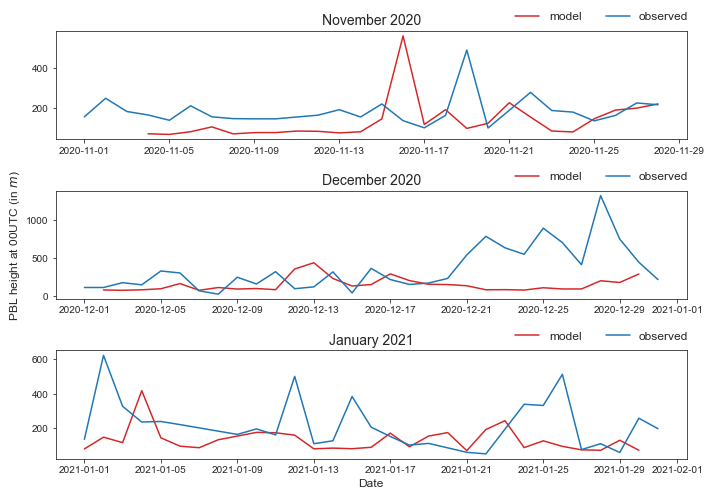

In [22]:
# Plot of PBLH data for Nov, Dec and Jan for 00 UTC

fig = plt.figure(figsize=(10,7))
plt.subplot(311)
plt.plot(dfnov00.index, dfnov00['mod_pbl'], label='model', color='tab:red')
# plt.xticks(rotation= 10)
plt.plot(dfnov00.index, dfnov00['obs_pbl'], label='observed', color='tab:blue')
#plt.xticks(rotation= 10)
# plt.ylabel('PBL height (in $m$)', fontsize=12)
# plt.xlabel('ffill', fontsize=12)
plt.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.13), prop={'size': 12})
plt.title('November 2020', fontsize=14)

plt.subplot(312)
plt.plot(dfdec00.index, dfdec00['mod_pbl'], label='model', color='tab:red')
# plt.xticks(rotation= 10)
plt.plot(dfdec00.index, dfdec00['obs_pbl'], label='observed', color='tab:blue')
#plt.xticks(rotation= 10)
plt.ylabel('PBL height at 00UTC (in $m$)', fontsize=12)
# plt.xlabel('ffill', fontsize=12)
plt.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.13), prop={'size': 12})
plt.title('December 2020', fontsize=14)

plt.subplot(313)
plt.plot(dfjan00.index, dfjan00['mod_pbl'], label='model', color='tab:red')
# plt.xticks(rotation= 10)
plt.plot(dfjan00.index, dfjan00['obs_pbl'], label='observed', color='tab:blue')
#plt.xticks(rotation= 10)
# plt.ylabel('PBL height (in $m$)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.13), prop={'size': 12})
plt.title('January 2021', fontsize=14)

# fig.suptitle('PBL Height in Delhi - 00UTC', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pblh_ts00.pdf', dpi=300)

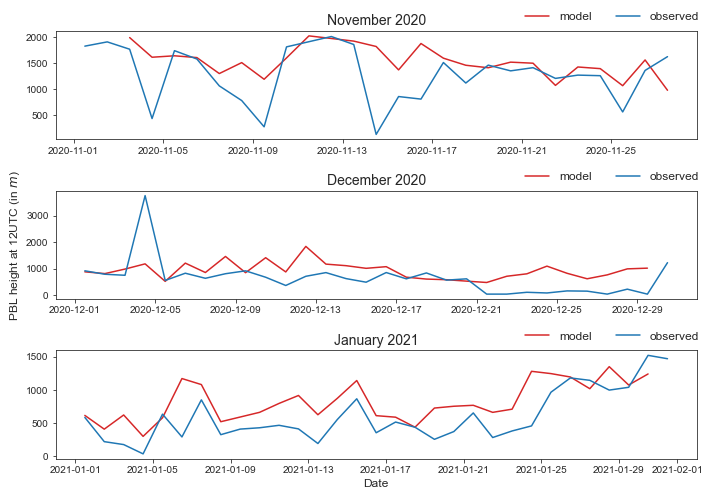

In [21]:
# Plot of PBLH data for Nov, Dec and Jan for 12 UTC

fig = plt.figure(figsize=(10,7))
plt.subplot(311)
plt.plot(dfnov12.index, dfnov12['mod_pbl'], label='model', color='tab:red')
# plt.xticks(rotation= 10)
plt.plot(dfnov12.index, dfnov12['obs_pbl'], label='observed', color='tab:blue')
#plt.xticks(rotation= 10)
# plt.ylabel('PBL height (in $m$)', fontsize=12)
# plt.xlabel('Time', fontsize=12)
plt.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.13), prop={'size': 12})
plt.title('November 2020', fontsize=14)

plt.subplot(312)
plt.plot(dfdec12.index, dfdec12['mod_pbl'], label='model', color='tab:red')
# plt.xticks(rotation= 10)
plt.plot(dfdec12.index, dfdec12['obs_pbl'], label='observed', color='tab:blue')
#plt.xticks(rotation= 10)
plt.ylabel('PBL height at 12UTC (in $m$)', fontsize=12)
# plt.xlabel('Time', fontsize=12)
plt.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.13), prop={'size': 12})
plt.title('December 2020', fontsize=14)

plt.subplot(313)
plt.plot(dfjan12.index, dfjan12['mod_pbl'], label='model', color='tab:red')
# plt.xticks(rotation= 10)
plt.plot(dfjan12.index, dfjan12['obs_pbl'], label='observed', color='tab:blue')
#plt.xticks(rotation= 10)
# plt.ylabel('PBL height (in $m$)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(ncol=2, frameon=False, loc='right', bbox_to_anchor=(1.02, 1.13), prop={'size': 12})
plt.title('January 2021', fontsize=14)

# fig.suptitle('PBL Height in Delhi - 12UTC', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pblh_ts12.pdf', dpi=300)

### statistical performance

#### November

In [16]:
# November combined
stat_calc.get_stat_performance(dfnov.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias 122.85677326530615
fractional bias is :
fractional bias =  0.16358205948847981
Correlation coefficient is :
corr coeff =  0.8308371921419468  and p-value is =  1.5052388680144385e-13
RMSE is :
RMSE  418.0880996618141
NMSE is :
NMSE  0.3119779060621128


In [17]:
# November 00UTC
stat_calc.get_stat_performance(dfnov00.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias -45.0055392
fractional bias is :
fractional bias =  -0.2770983047128725
Correlation coefficient is :
corr coeff =  -0.05267964922081256  and p-value is =  0.8025203629519003
RMSE is :
RMSE  132.922661193211
NMSE is :
NMSE  0.682891280040669


In [18]:
# November 12UTC
stat_calc.get_stat_performance(dfnov12.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias 290.2861428000001
fractional bias is :
fractional bias =  0.20910927859225015
Correlation coefficient is :
corr coeff =  0.353834520707765  and p-value is =  0.08269832695474819
RMSE is :
RMSE  570.4708892238984
NMSE is :
NMSE  0.17073976462027954


#### December

In [79]:
# December combined
stat_calc.get_stat_performance(dfdec.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias 47.022670344827596
fractional bias is :
fractional bias =  0.09128275486379651
Correlation coefficient is :
corr coeff =  0.318632189691755  and p-value is =  0.014780547283056564
RMSE is :
RMSE  576.5630372592933
NMSE is :
NMSE  1.2553422087172694


In [24]:
# December 00UTC
stat_calc.get_stat_performance(dfdec00.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias -213.27526689655173
fractional bias is :
fractional bias =  -0.8230721454371394
Correlation coefficient is :
corr coeff =  -0.1142707830694216  and p-value is =  0.5550314779863065
RMSE is :
RMSE  382.8935818667868
NMSE is :
NMSE  2.6286887526480163


In [81]:
# December 12UTC
stat_calc.get_stat_performance(dfdec12.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias 307.32060758620696
fractional bias is :
fractional bias =  0.3985260615899823
Correlation coefficient is :
corr coeff =  0.28000494402807374  and p-value is =  0.14124822700434386
RMSE is :
RMSE  719.8905311452186
NMSE is :
NMSE  0.907525182477283


#### January

In [83]:
# January combined
stat_calc.get_stat_performance(dfjan.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias 91.16676648148147
fractional bias is :
fractional bias =  0.19980132922889743
Correlation coefficient is :
corr coeff =  0.7438429805136  and p-value is =  1.1599753770091305e-10
RMSE is :
RMSE  289.52127313173844
NMSE is :
NMSE  0.4066686533862539


In [84]:
# January 00UTC
stat_calc.get_stat_performance(dfjan00.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias -82.8015975
fractional bias is :
fractional bias =  -0.4760558322130856
Correlation coefficient is :
corr coeff =  0.024394320314236134  and p-value is =  0.8981849365280008
RMSE is :
RMSE  175.69674494671426
NMSE is :
NMSE  1.0816737284271603


In [85]:
# January 12UTC
stat_calc.get_stat_performance(dfjan12.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias 251.69641983333332
fractional bias is :
fractional bias =  0.36422411088176515
Correlation coefficient is :
corr coeff =  0.7225194269766047  and p-value is =  6.527776621887859e-06
RMSE is :
RMSE  349.26103217292524
NMSE is :
NMSE  0.26419897015387184


#### Overall

In [23]:
# Get overall datafram

df = pd.concat([dfnov, dfdec, dfjan], axis=0)
df00 = pd.concat([dfnov00, dfdec00, dfjan00], axis=0)
df12 = pd.concat([dfnov12, dfdec12, dfjan12], axis=0)

In [24]:
df00.to_csv(r'./data/pblh00_data.csv')
df12.to_csv(r'./data/pb')

In [25]:
df12

,obs_pbl,mod_pbl
datetime,,
2020-11-01 12:00:00,1823.0,NaN
2020-11-02 12:00:00,1905.0,NaN
2020-11-03 12:00:00,1764.0,1987.59082
2020-11-04 12:00:00,431.0,1609.97534
2020-11-05 12:00:00,1736.0,1637.60486
...,...,...
2021-01-27 12:00:00,1142.0,1015.98407
2021-01-28 12:00:00,995.0,1347.46631
2021-01-29 12:00:00,1037.0,1071.61462


In [88]:
# Overall stat performance combined

stat_calc.get_stat_performance(df.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias 84.90870906832298
fractional bias is :
fractional bias =  0.14969972561122039
Correlation coefficient is :
corr coeff =  0.6622982520570175  and p-value is =  1.0986956853242754e-21
RMSE is :
RMSE  448.4074665769083
NMSE is :
NMSE  0.6285259031625834


In [90]:
# Overall 00UTC
stat_calc.get_stat_performance(df00.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias -116.59725172619048
fractional bias is :
fractional bias =  -0.5832322080870552
Correlation coefficient is :
corr coeff =  -0.026949047743174984  and p-value is =  0.80774559329048
RMSE is :
RMSE  258.6459380813352
NMSE is :
NMSE  1.8294290223305996


In [91]:
# Overall 12UTC
stat_calc.get_stat_performance(df12.dropna())

Enter the column for model value:  mod_pbl
Enter the column for observation value:  obs_pbl


Mean bias :
mean bias 282.38504505952386
fractional bias is :
fractional bias =  0.30489002341521027
Correlation coefficient is :
corr coeff =  0.59468687946833  and p-value is =  2.4520873722478844e-09
RMSE is :
RMSE  565.1006323390168
NMSE is :
NMSE  0.3811242046894013


### QQ plots

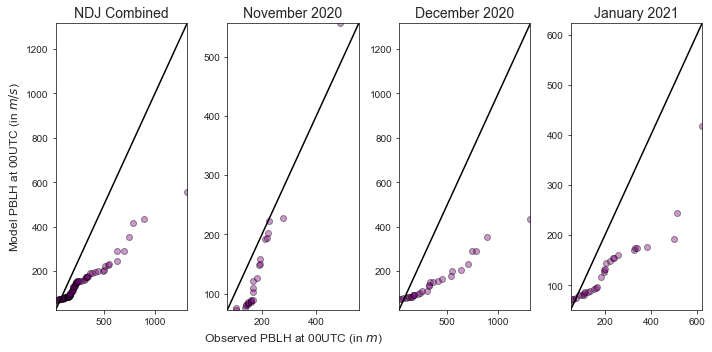

In [26]:
# Q-Q plot for PBLH at 00UTC

fig = plt.figure(figsize=(10,5))

plt.subplot(141)
qqplot.plot(df00.dropna()['obs_pbl'], df00.dropna()['mod_pbl'], c='purple', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PBLH at 00UTC (in $m$)', fontsize=12)
plt.ylabel('Model PBLH at 00UTC (in $m/s$) ', fontsize=12)
plt.title('NDJ Combined',fontsize=14)

plt.subplot(142)
qqplot.plot(dfnov00.dropna()['obs_pbl'], dfnov00.dropna()['mod_pbl'], c='purple', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PBLH at 00UTC (in $m$)', fontsize=12)
# plt.ylabel('Model PBLH', fontsize=12)
plt.title('November 2020', fontsize=14)

plt.subplot(143)
qqplot.plot(dfdec00.dropna()['obs_pbl'], dfdec00.dropna()['mod_pbl'], c='purple', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PBLH', fontsize=12)
# plt.ylabel('Model PBLH', fontsize=12)
plt.title('December 2020', fontsize=14)

plt.subplot(144)
qqplot.plot(dfjan00.dropna()['obs_pbl'], dfjan00.dropna()['mod_pbl'], c='purple', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PBLH', fontsize=12)
# plt.ylabel('Model PBLH', fontsize=12)
plt.title('January 2021', fontsize=14)

# fig.suptitle('Q-Q Plot for PBLH (in $m$) in Delhi at 00UTC', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/qqplot_pblh00.pdf', dpi=300)

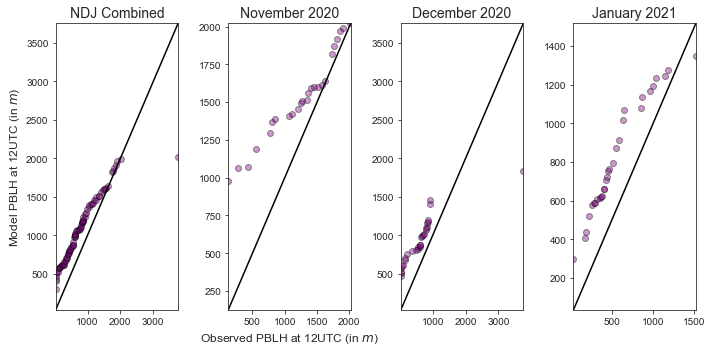

In [27]:
# Q-Q plot for PBLH at 12UTC

fig = plt.figure(figsize=(10,5))

plt.subplot(141)
qqplot.plot(df12.dropna()['obs_pbl'], df12.dropna()['mod_pbl'], c='purple', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PBLH at 12UTC (in $m/s$)', fontsize=12)
plt.ylabel('Model PBLH at 12UTC (in $m$)', fontsize=12)
plt.title('NDJ Combined',fontsize=14)

plt.subplot(142)
qqplot.plot(dfnov12.dropna()['obs_pbl'], dfnov12.dropna()['mod_pbl'], c='purple', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PBLH at 12UTC (in $m$)', fontsize=12)
# plt.ylabel('Model PBLH', fontsize=12)
plt.title('November 2020', fontsize=14)

plt.subplot(143)
qqplot.plot(dfdec12.dropna()['obs_pbl'], dfdec12.dropna()['mod_pbl'], c='purple', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PBLH', fontsize=12)
# plt.ylabel('Model PBLH', fontsize=12)
plt.title('December 2020', fontsize=14)

plt.subplot(144)
qqplot.plot(dfjan12.dropna()['obs_pbl'], dfjan12.dropna()['mod_pbl'], c='purple', alpha=0.4, edgecolor='k', rug=False)
# plt.xlabel('Observed PBLH', fontsize=12)
# plt.ylabel('Model PBLH', fontsize=12)
plt.title('January 2021', fontsize=14)

# fig.suptitle('Q-Q Plot for PBLH (in $m$) in Delhi at 12UTC', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/qqplot_pblh12.pdf', dpi=300)

### Scatter - R plots

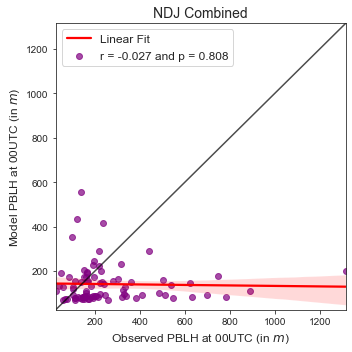

In [33]:
# Scatter-Correlation plot for PBLH 00UTC

fig = plt.figure(figsize=(5,5))

# plt.subplot(221)
rplot.plot(df00, df00.dropna()['obs_pbl'], df00.dropna()['mod_pbl'], color='purple', alpha=0.7)
plt.xlabel('Observed PBLH at 00UTC (in $m$)', fontsize=12)
plt.ylabel('Model PBLH at 00UTC (in $m$)', fontsize=12)
plt.title('NDJ Combined',fontsize=14)

# plt.subplot(222)
# rplot.plot(dfnov00, dfnov00.dropna()['obs_pbl'], dfnov00.dropna()['mod_pbl'], color='purple', alpha=0.7)
# # plt.xlabel('Observed PBLH', fontsize=12)
# # plt.ylabel('Model PBLH', fontsize=12)
# plt.title('November 2020', fontsize=14)

# plt.subplot(223)
# rplot.plot(dfdec00, dfdec00.dropna()['obs_pbl'], dfdec00.dropna()['mod_pbl'], color='purple', alpha=0.7)
# plt.xlabel('Observed PBLH at 00UTC (in $m$)', fontsize=12)
# plt.ylabel('Model PBLH at 00UTC (in $m$)', fontsize=12)
# plt.title('December 2020', fontsize=14)

# plt.subplot(224)
# rplot.plot(dfjan00, dfjan00.dropna()['obs_pbl'], dfjan00.dropna()['mod_pbl'], color='purple', alpha=0.7)
# plt.xlabel('Observed PBLH at 00UTC (in $m$)', fontsize=12)
# # plt.ylabel('Model PBLH', fontsize=12)
# plt.title('January 2021', fontsize=14)

# fig.suptitle('Scatter Plots for PBLH (in $m$) in Delhi at 00UTC', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/rplot_pblh00.pdf',dpi=300)

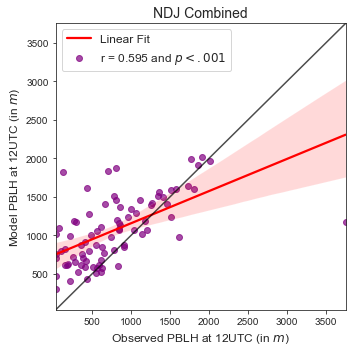

In [32]:
# Scatter-Correlation plot for PBLH 12UTC

fig = plt.figure(figsize=(5,5))

# plt.subplot(221)
rplot.plot(df12, df12.dropna()['obs_pbl'], df12.dropna()['mod_pbl'], color='purple', alpha=0.7)
plt.xlabel('Observed PBLH at 12UTC (in $m$)', fontsize=12)
plt.ylabel('Model PBLH at 12UTC (in $m$)', fontsize=12)
plt.title('NDJ Combined',fontsize=14)

# plt.subplot(222)
# rplot.plot(dfnov12, dfnov12.dropna()['obs_pbl'], dfnov12.dropna()['mod_pbl'], color='purple', alpha=0.7)
# # plt.xlabel('Observed PBLH', fontsize=12)
# # plt.ylabel('Model PBLH', fontsize=12)
# plt.title('November 2020', fontsize=14)

# plt.subplot(223)
# rplot.plot(dfdec12, dfdec12.dropna()['obs_pbl'], dfdec12.dropna()['mod_pbl'], color='purple', alpha=0.7)
# plt.xlabel('Observed PBLH at 12UTC (in $m$)', fontsize=12)
# plt.ylabel('Model PBLH at 12UTC (in $m$)', fontsize=12)
# plt.title('December 2020', fontsize=14)

# plt.subplot(224)
# rplot.plot(dfjan12, dfjan12.dropna()['obs_pbl'], dfjan12.dropna()['mod_pbl'], color='purple', alpha=0.7)
# plt.xlabel('Observed PBLH at 12UTC (in $m$)', fontsize=12)
# # plt.ylabel('Model PBLH', fontsize=12)
# plt.title('January 2021', fontsize=14)

# fig.suptitle('Scatter Plots for PBLH (in $m$) in Delhi at 12UTC', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/rplot_pblh12.pdf', dpi=300)